<a href="https://colab.research.google.com/github/HwangHanJae/DataScience_LearningNote_BikeSharingDemand/blob/main/Bike_Sharing_Demand_Transcription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 캐글 필사
- Topic : Bike Sharing Demand

부스트코스에서 제공하는 **박조은 강사님**의 자전거 수요량 예측 자료

< 출처 : 박조은 강사님 [Github](https://github.com/corazzon/KaggleStruggle/blob/master/kaggle-survey-2017/Kaggle-ML-DS-survey-2017-EDA-FAQ.ipynb) >

### Data Fields
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

### Evaluation
Submissions are evaluated one the Root Mean Squared Logarithmic Error . The ***RMSLE*** is calculated as

$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $

회귀와 관련 된 문제 => 자전거 대여량을 예측하는 문제이기 때문에

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats

#노트북 안에 그래프를 그리기 위해
%matplotlib inline

#그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 'ggplot' 스타일을 사용
plt.style.use('ggplot')

#그래프에서 마이너스 폰트 깨지는 문제 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

#오류 메시지 무시
import warnings
warnings.filterwarnings('ignore')

#그래프에서 한글폰트 깨지는 문제 대처
#1.한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#맷플롯라이브러리에 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

from IPython.display import set_matplotlib_formats
# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,392 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

데이터를 가지고 올때 parse_data=['datatime']을 하면 datatime의 column의 타입을 date 타입으로 가져올 수 있음

In [ ]:
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.shape

(10886, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
train.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [ ]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [ ]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

null인 데이터값을 시각화 해주는 라이브러리

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


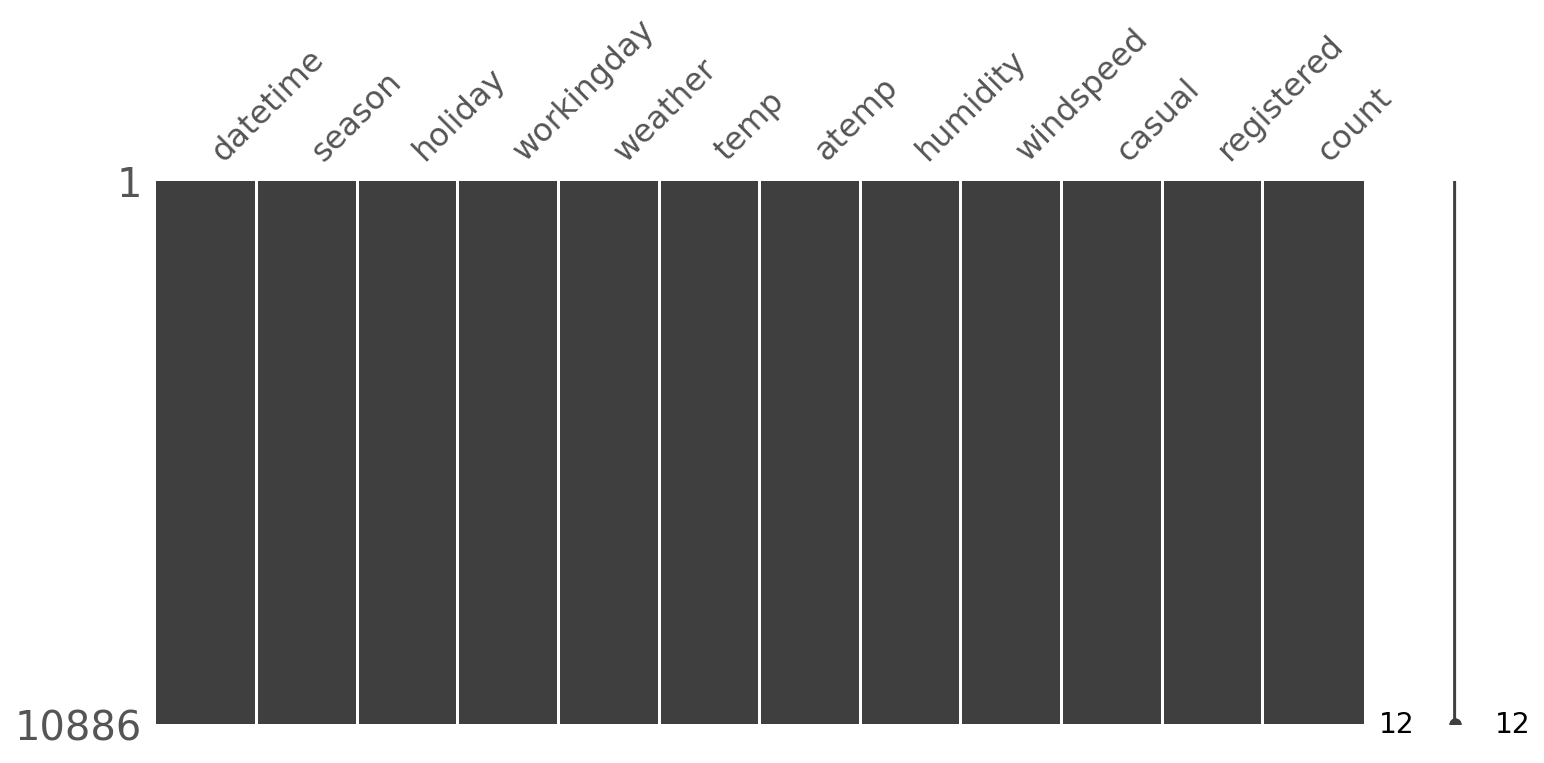

In [ ]:
import missingno as msno
msno.matrix(train, figsize=(12,5))

datetime 특성(yyyy-mm-dd hh-mm-ss)을 각 column으로 나누어줌

In [ ]:
train['datetime'].dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [ ]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.shape

(10886, 18)

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


f, ax = plt.subplots(nrows=2,ncols=3, figsize=(18,8)) 지정하여

ax = ax[0,0], 혹은 ax= ax[2,2] 등 지정을 해주어도 되지만 아래의 방법을 사용

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


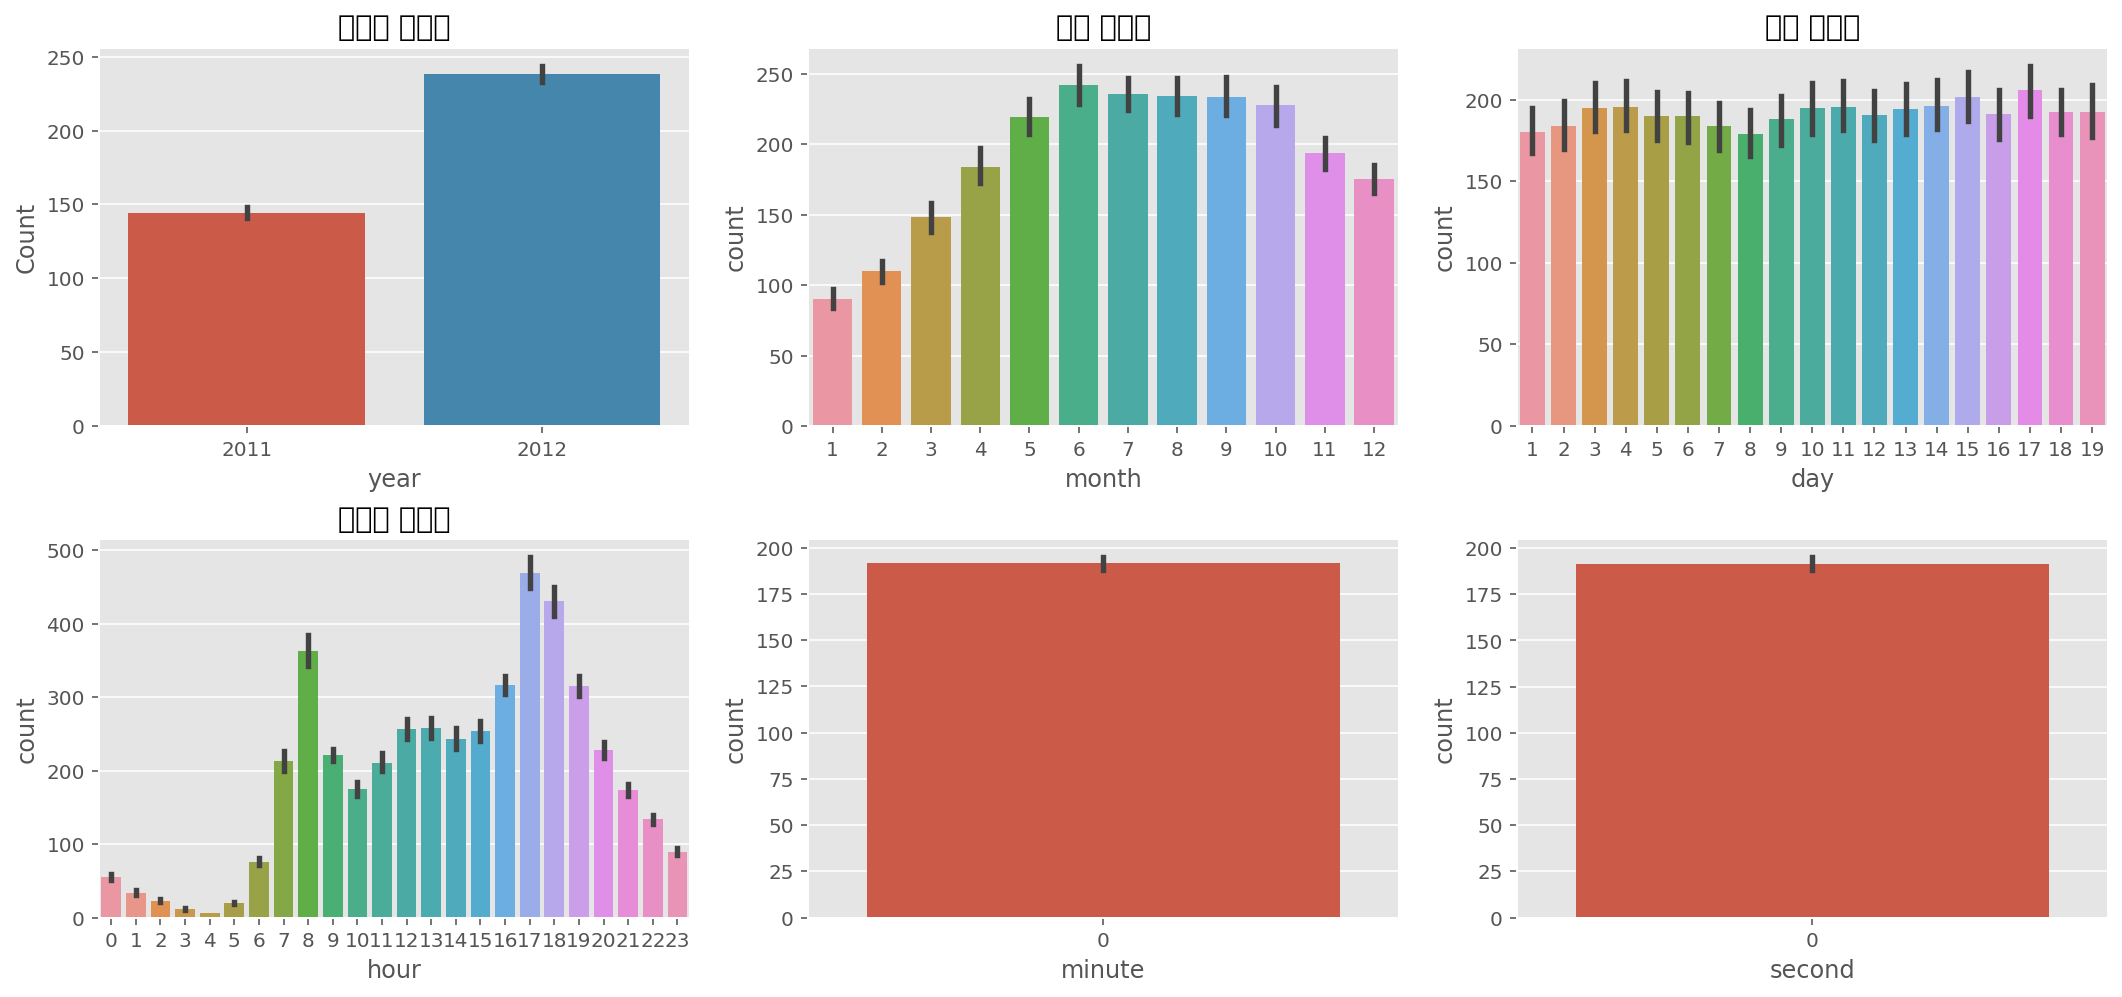

In [ ]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3, figsize=(18,8))

sns.barplot(data=train, x='year',y='count',ax=ax1)
sns.barplot(data=train, x='month',y='count',ax=ax2)
sns.barplot(data=train, x='day',y='count',ax=ax3)
sns.barplot(data=train, x='hour',y='count',ax=ax4)
sns.barplot(data=train, x='minute',y='count',ax=ax5)
sns.barplot(data=train, x='second',y='count',ax=ax6)

ax1.set(ylabel = 'Count',title='연도별 대여량')
ax2.set(xlabel='month',title='월별 대여량')
ax3.set(xlabel='day',title='일별 대여량')
ax4.set(xlabel='hour',title='시간별 대여량')

plt.subplots_adjust(hspace=0.3) #각 그래프별 높이간격 조절
plt.show()

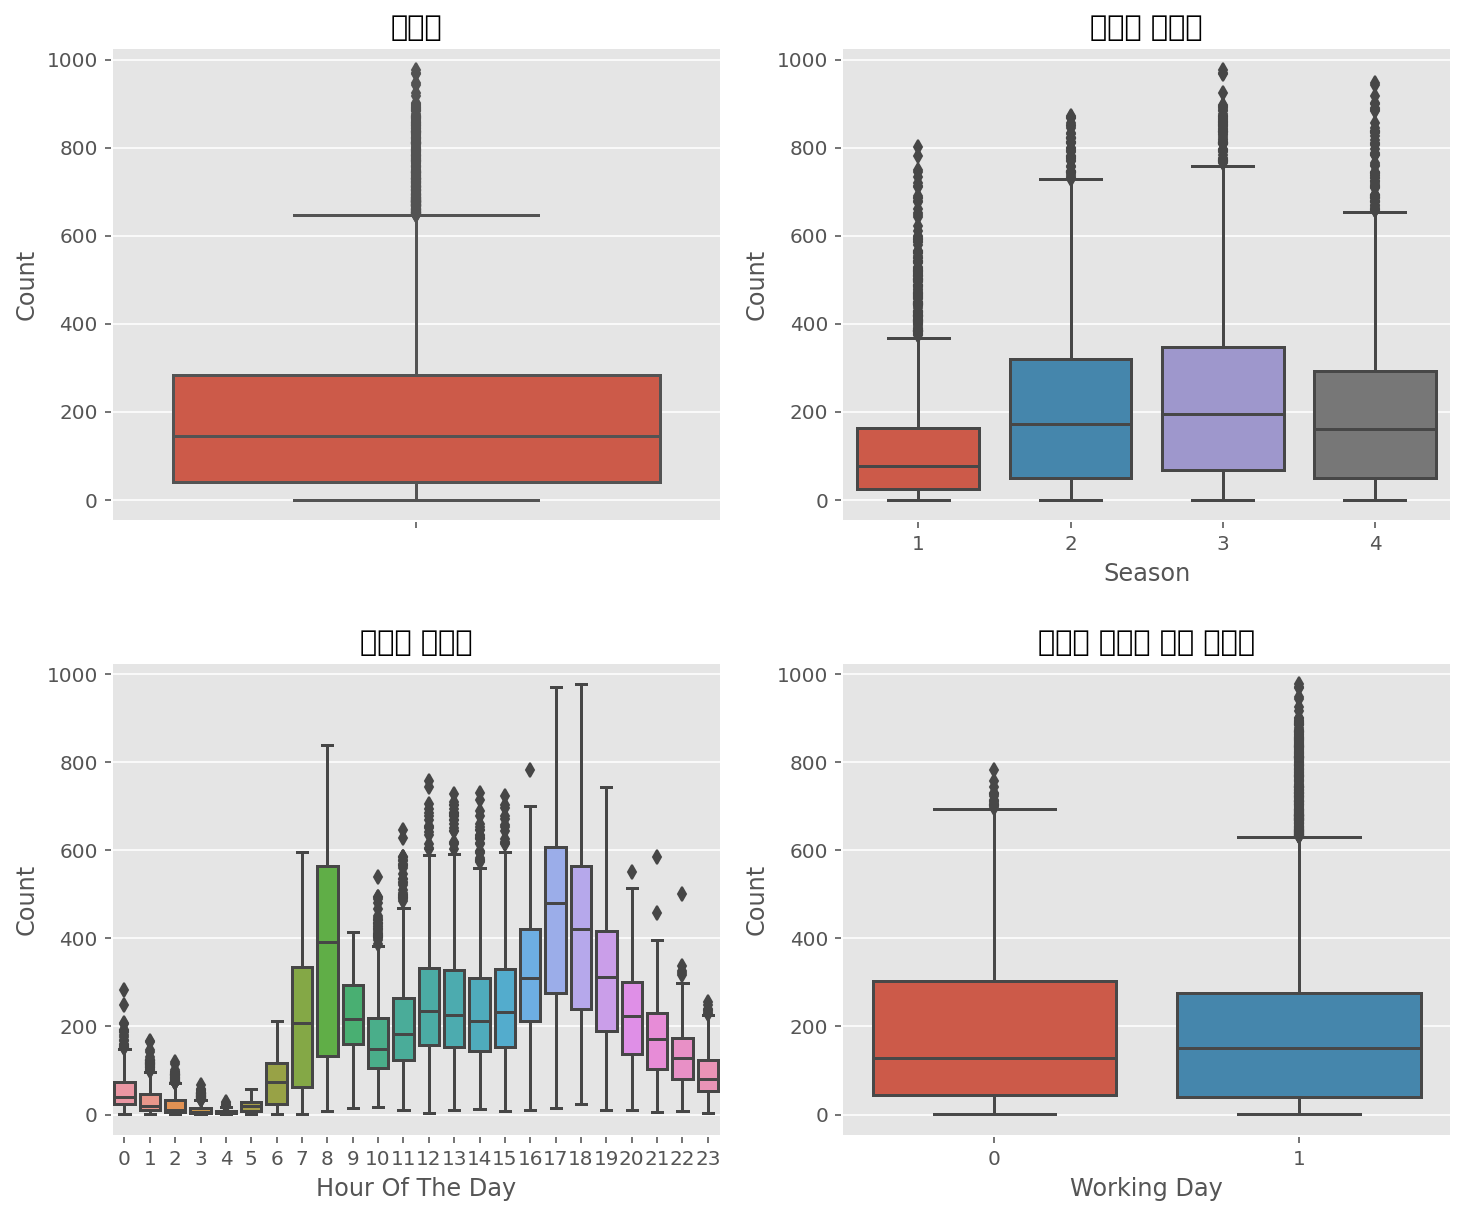

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(12,10))

#orient='v'옵션은 boxplot의 방향을 세로 방향으로 바꾸어줌
sns.boxplot(data=train, y='count',orient='v',ax=axes[0,0])
sns.boxplot(data=train, y='count',x='season',orient='v',ax=axes[0,1])
sns.boxplot(data=train, y='count',x='hour',orient='v',ax=axes[1,0])
sns.boxplot(data=train, y='count',x='workingday',orient='v',ax=axes[1,1])

axes[0,0].set(ylabel='Count',title='대여량')
axes[0,1].set(xlabel='Season',ylabel='Count',title='계절별 대여량')
axes[1,0].set(xlabel='Hour Of The Day',ylabel='Count',title='시간별 대여량')
axes[1,1].set(xlabel='Working Day',ylabel='Count',title='근무일 여부에 따른 대여량')
plt.subplots_adjust(hspace=0.3) #각 그래프별 높이간격 조절

plt.show()

In [ ]:
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [ ]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

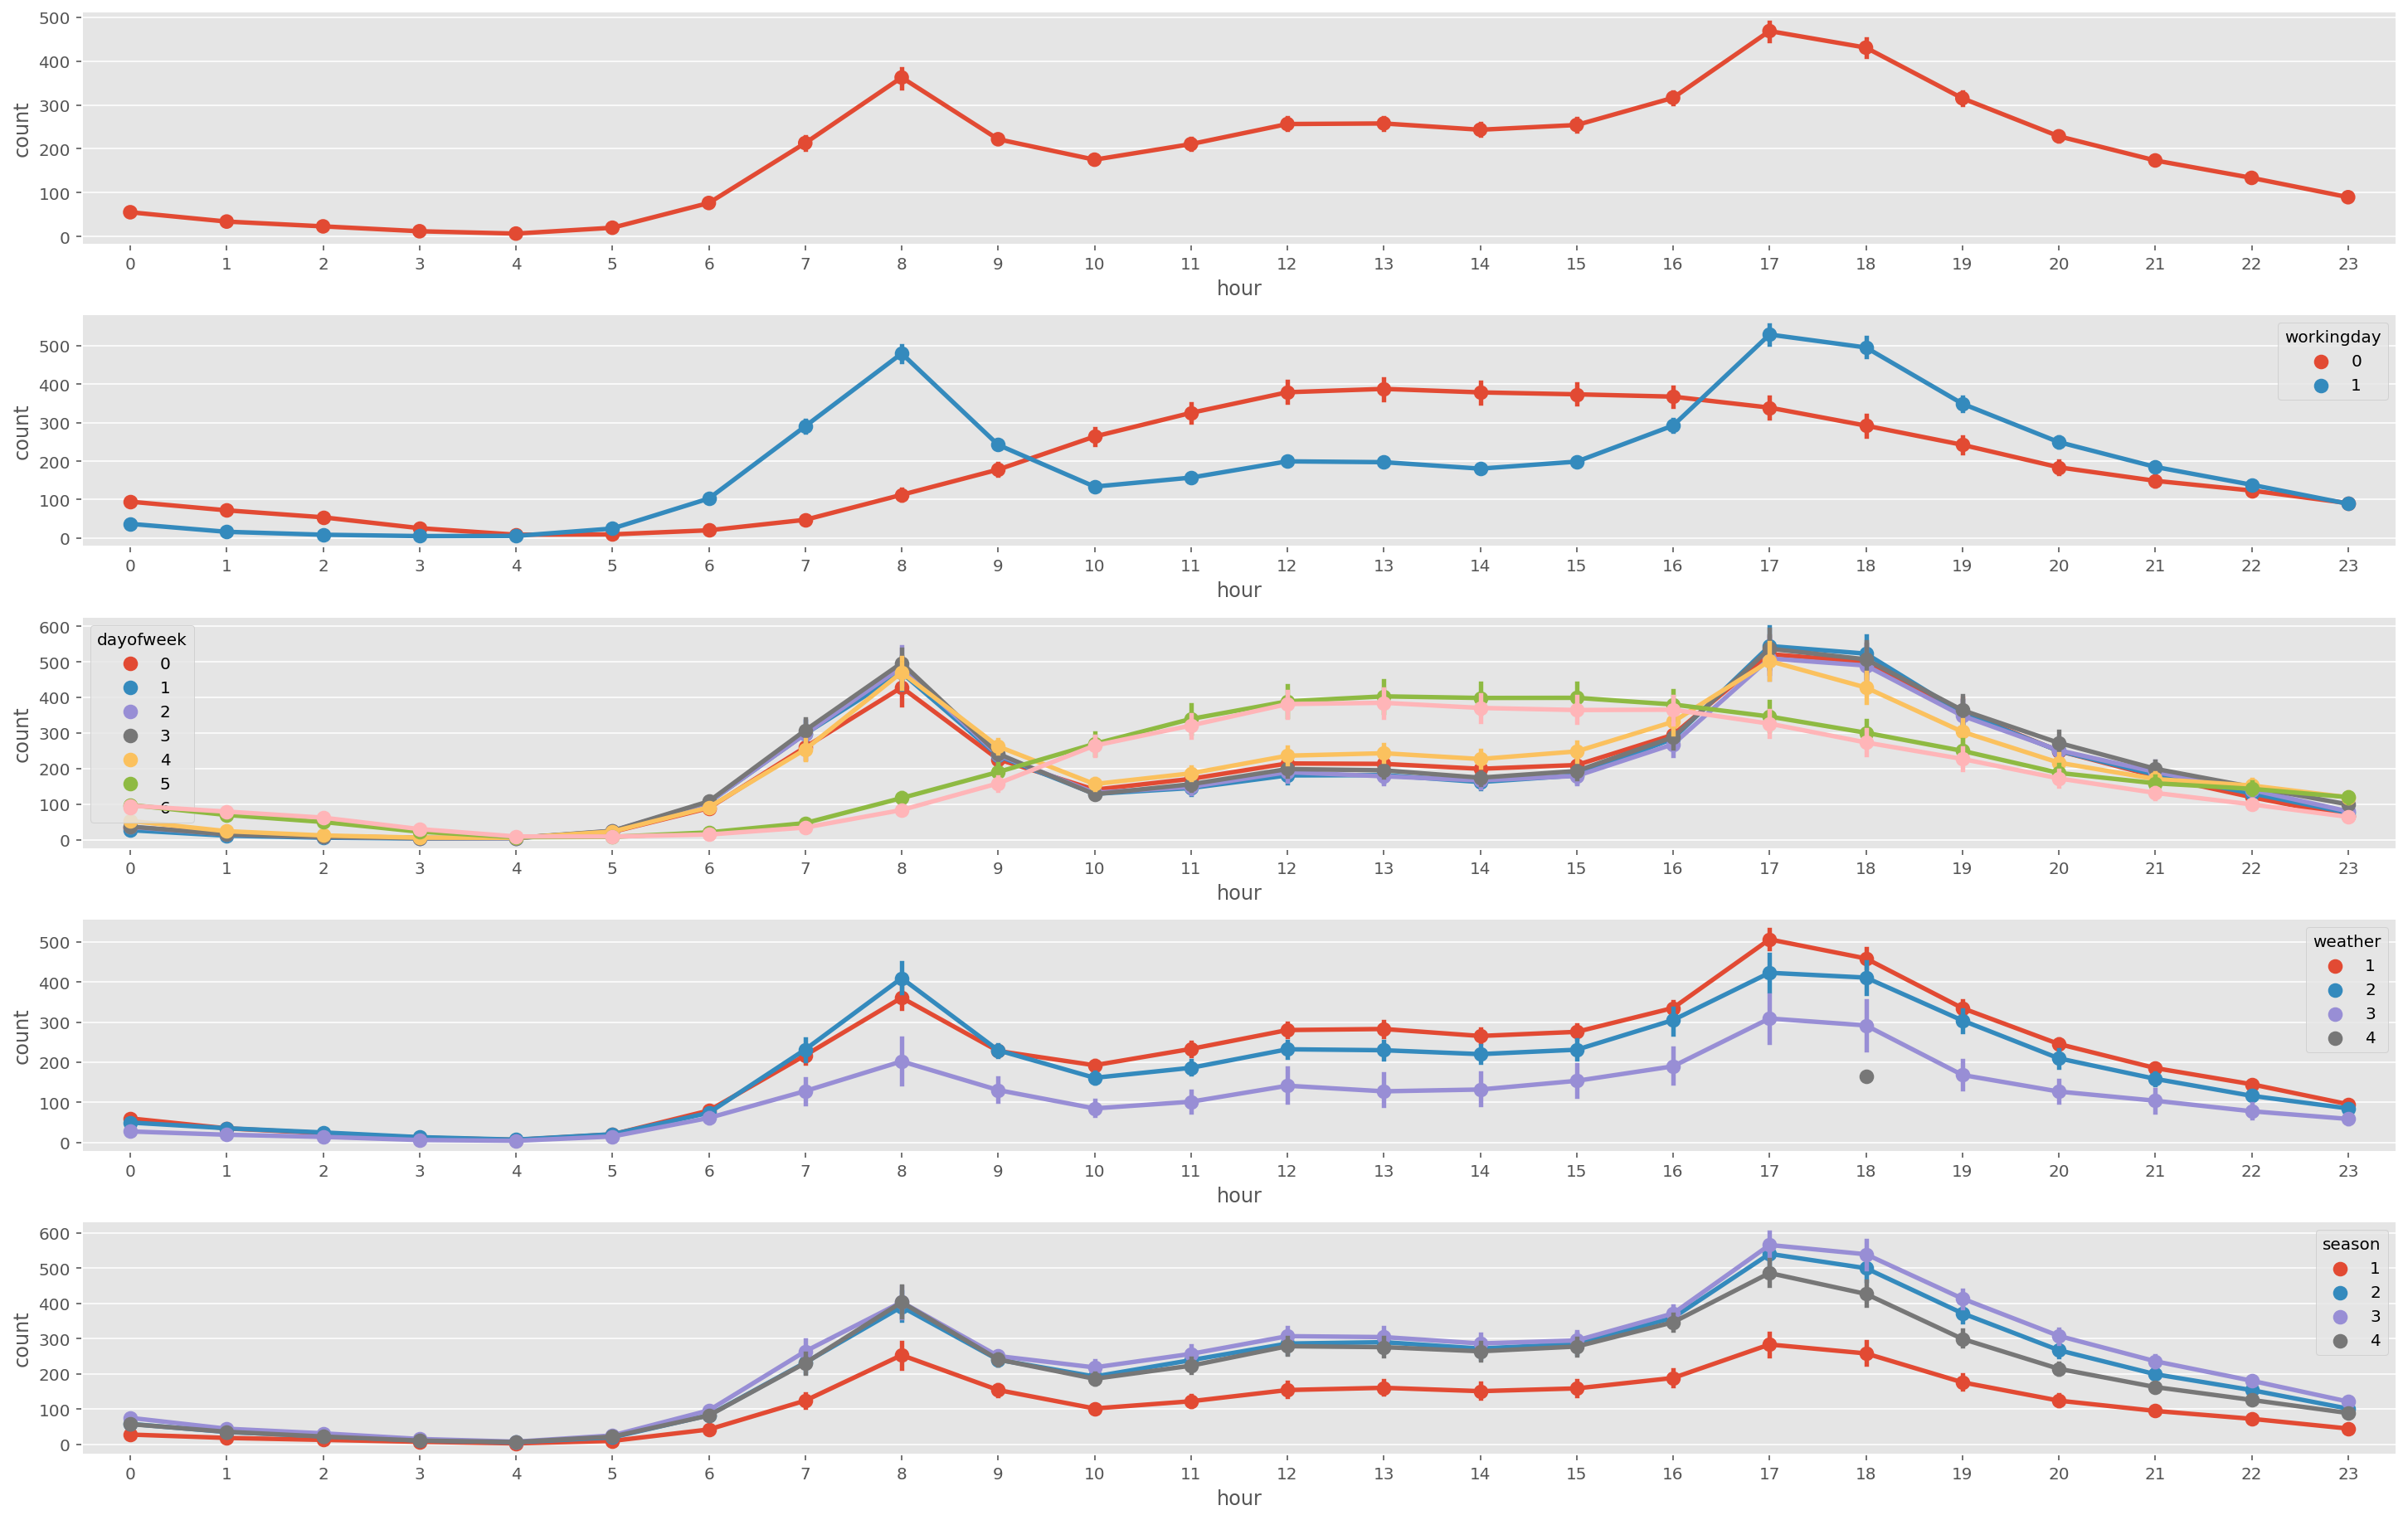

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5,figsize=(25,16))

sns.pointplot(x='hour', y='count',data=train, ax=ax1)
sns.pointplot(x='hour', y='count',hue='workingday',data=train, ax=ax2)
sns.pointplot(x='hour', y='count',hue='dayofweek',data=train, ax=ax3)
sns.pointplot(x='hour', y='count',hue='weather',data=train, ax=ax4)
sns.pointplot(x='hour', y='count',hue='season',data=train, ax=ax5)
plt.subplots_adjust(hspace=0.3)
plt.show()

온도, 등록여부, 습도, 풍속 등이 어떤 연관관(상관관계-correlation )가 있는지 조사

In [ ]:
train[['temp','atemp','casual','registered','humidity','windspeed','count']]

,temp,atemp,casual,registered,humidity,windspeed,count
0,9.84,14.395,3,13,81,0.0000,16
1,9.02,13.635,8,32,80,0.0000,40
2,9.02,13.635,5,27,80,0.0000,32
3,9.84,14.395,3,10,75,0.0000,13
4,9.84,14.395,0,1,75,0.0000,1
...,...,...,...,...,...,...,...
10881,15.58,19.695,7,329,50,26.0027,336
10882,14.76,17.425,10,231,57,15.0013,241
10883,13.94,15.910,4,164,61,15.0013,168
10884,13.94,17.425,12,117,61,6.0032,129


In [ ]:
corrMatt = train[['temp','atemp','casual','registered','humidity','windspeed','count']]
corrMatt = corrMatt.corr()
print(corrMatt)


#sns.heatmap을 그릴때 한쪽만 보여주기위함
mask = np.array(corrMatt)

mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  ...  humidity  windspeed     count
temp        1.000000  0.984948  0.467097  ... -0.064949  -0.017852  0.394454
atemp       0.984948  1.000000  0.462067  ... -0.043536  -0.057473  0.389784
casual      0.467097  0.462067  1.000000  ... -0.348187   0.092276  0.690414
registered  0.318571  0.314635  0.497250  ... -0.265458   0.091052  0.970948
humidity   -0.064949 -0.043536 -0.348187  ...  1.000000  -0.318607 -0.317371
windspeed  -0.017852 -0.057473  0.092276  ... -0.318607   1.000000  0.101369
count       0.394454  0.389784  0.690414  ... -0.317371   0.101369  1.000000

[7 rows x 7 columns]


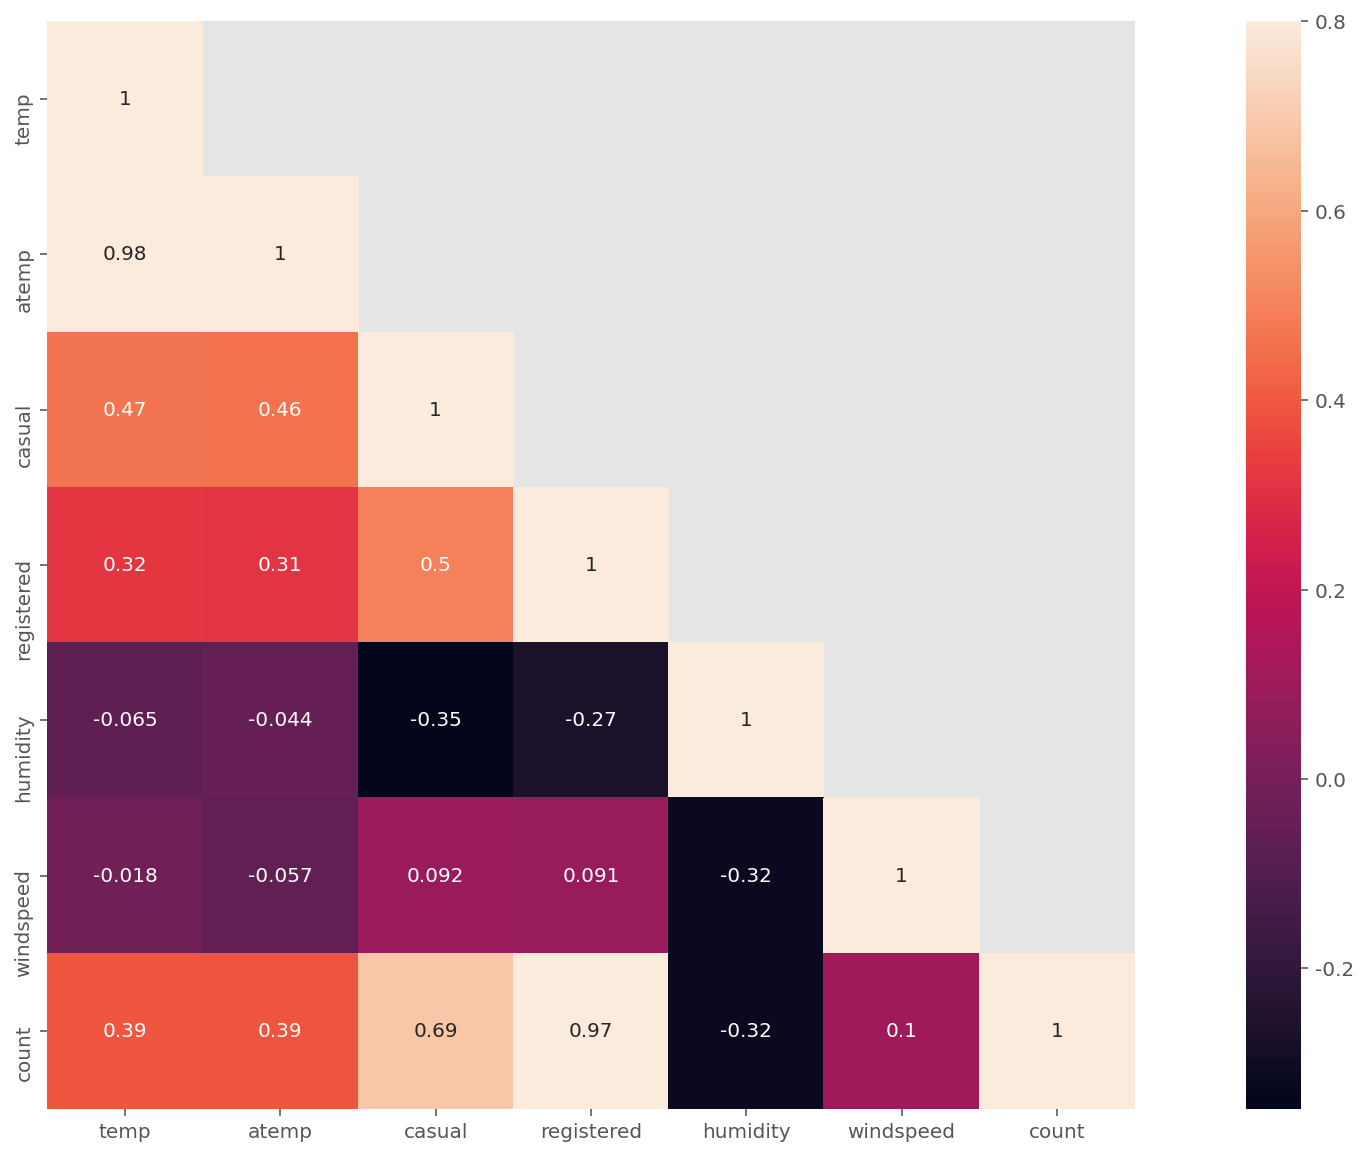

In [ ]:
fig, axes = plt.subplots(figsize=(20,10))
#mask=mask를 하여 한쪽만 보여주고, annot=True로 하여 숫자를 보여주며, square=True로 하여 정사각형으로 만들어줌
sns.heatmap(data=corrMatt, annot=True, square=True, vmax=.8,mask=mask)


온도, 풍속, 습도에 따라 산점도를 그려봄

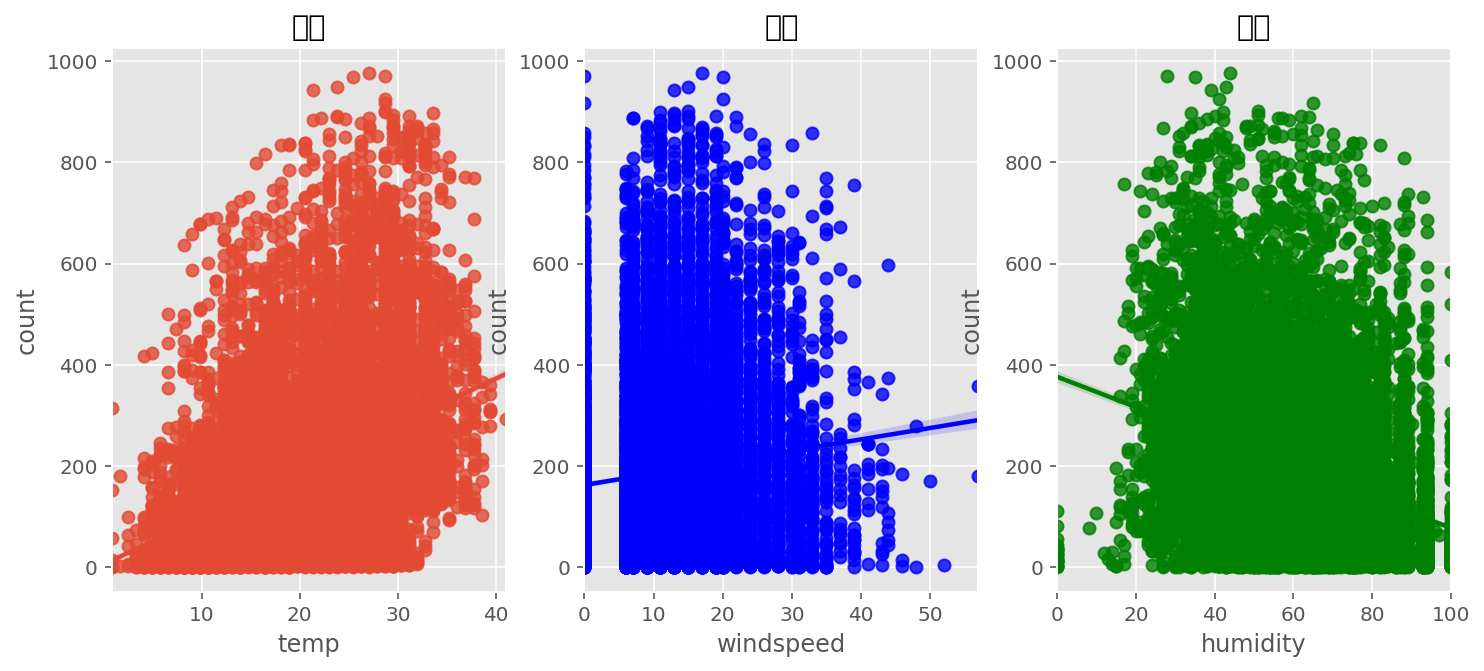

In [ ]:
fig, axes= plt.subplots(ncols=3, figsize=(12,5))

#regplot은 scatterplot과 lineplot을 함께 볼 수 있다.
sns.regplot(x='temp',y='count',data=train, ax=axes[0])
sns.regplot(x='windspeed',y='count',data=train, ax=axes[1], color='blue')
sns.regplot(x='humidity',y='count',data=train, ax=axes[2],color='green')

axes[0].set(title='온도')
axes[1].set(title='풍속')
axes[2].set(title='습도')
plt.show()

연데이터 + 월데이터

In [ ]:
def concatenate_year_month(datetime):
  return "{0}-{1}".format(datetime.year, datetime.month)
#concatenate_year_month의 매개변수로 들어오는 datetime의 타입은 Timestamp로 year과 month을 int형식으로 가지고 있음
train['year_month'] = train['datetime'].apply(concatenate_year_month)
train[['datetime','year_month']]

,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1
...,...,...
10881,2012-12-19 19:00:00,2012-12
10882,2012-12-19 20:00:00,2012-12
10883,2012-12-19 21:00:00,2012-12
10884,2012-12-19 22:00:00,2012-12


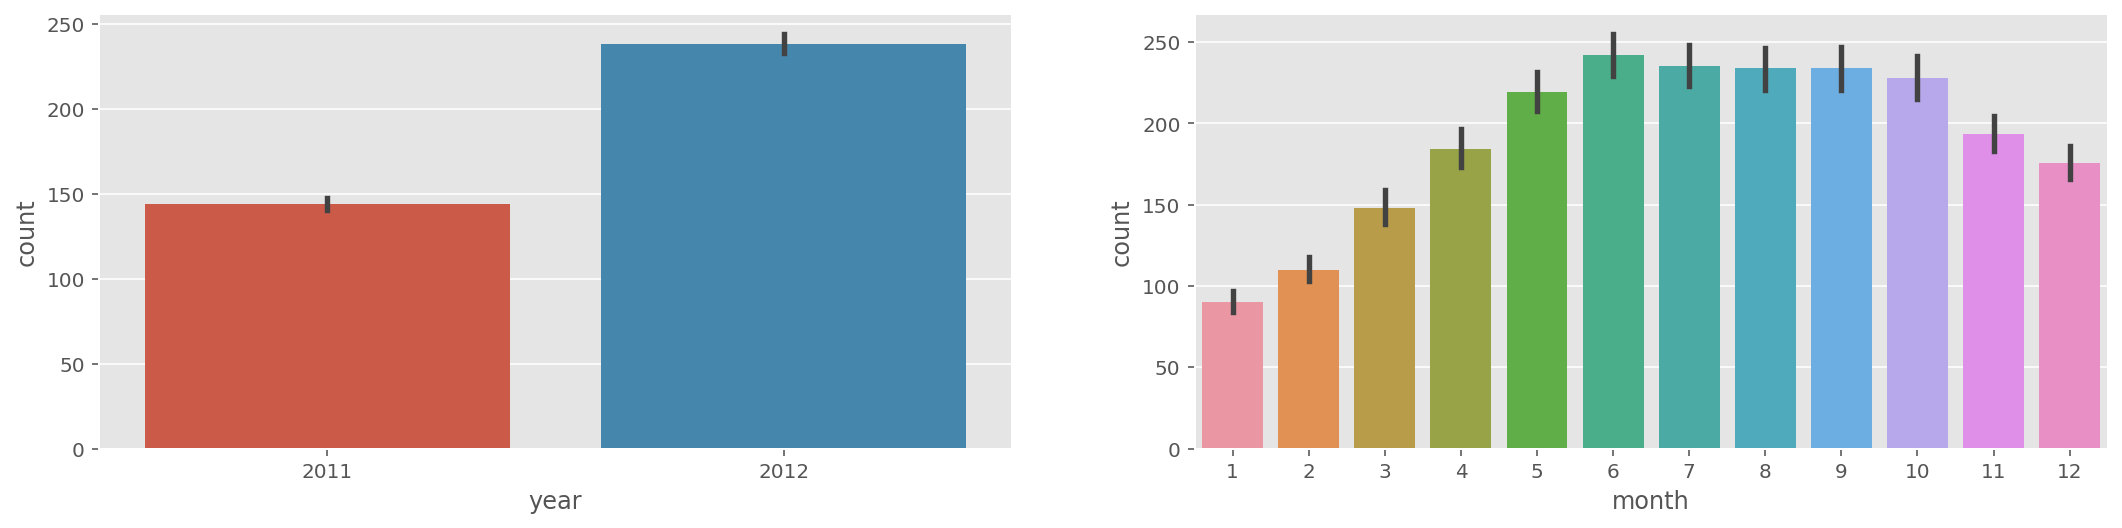

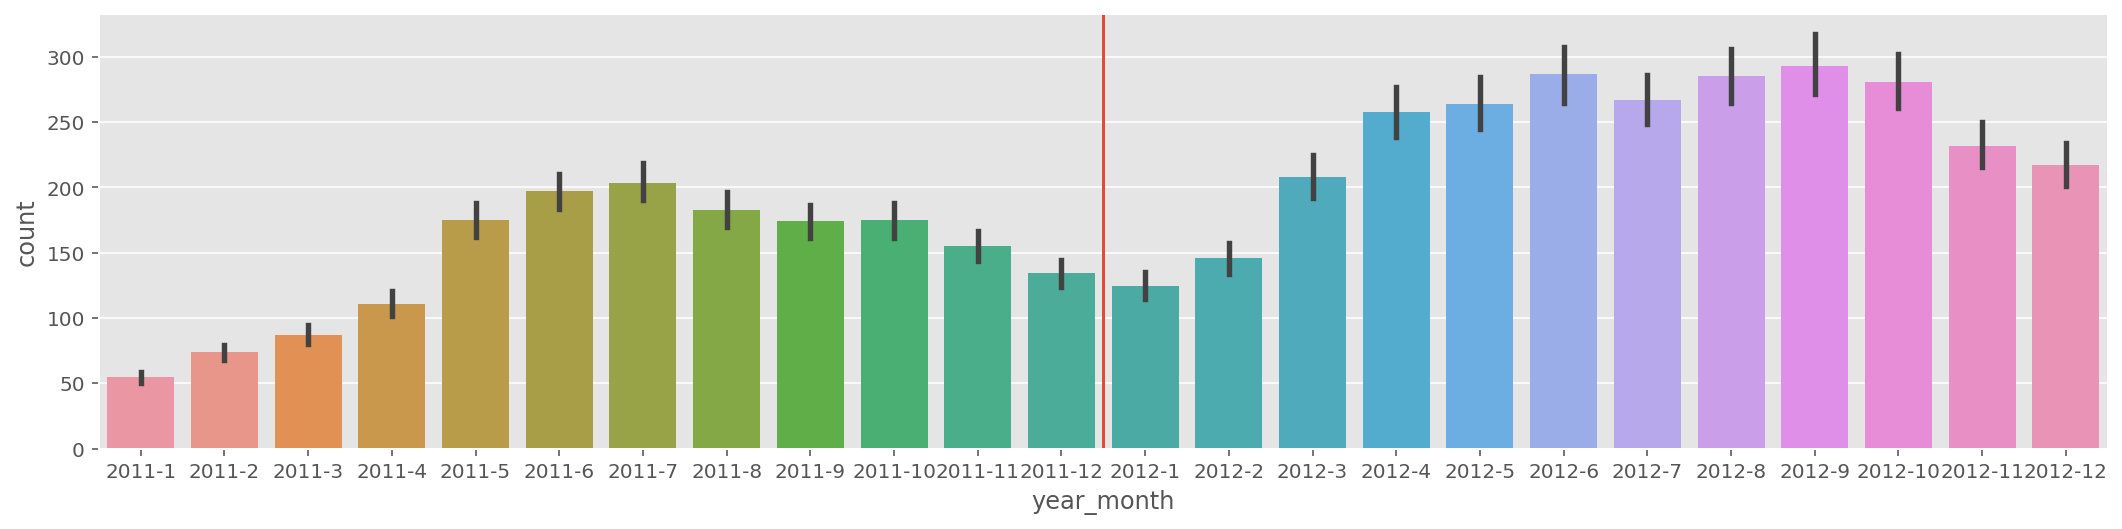

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(18,4))
sns.barplot(data=train, x='year', y='count',ax=ax1)
sns.barplot(data=train, x='month', y='count',ax=ax2)

fig, ax = plt.subplots(figsize=(18,4))
sns.barplot(data=train ,x='year_month',y='count',ax=ax)
plt.axvline(11.5,0) # 그래프에 수직선 추가
plt.show()

이상치 제거(outOutliers)

In [ ]:
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.        , 0.        , 0.        , ..., 6.59578051, 6.5971457 ,
         6.59850903])),
 (1.40968461015429, 4.523106928071492, 0.9537631807794258))

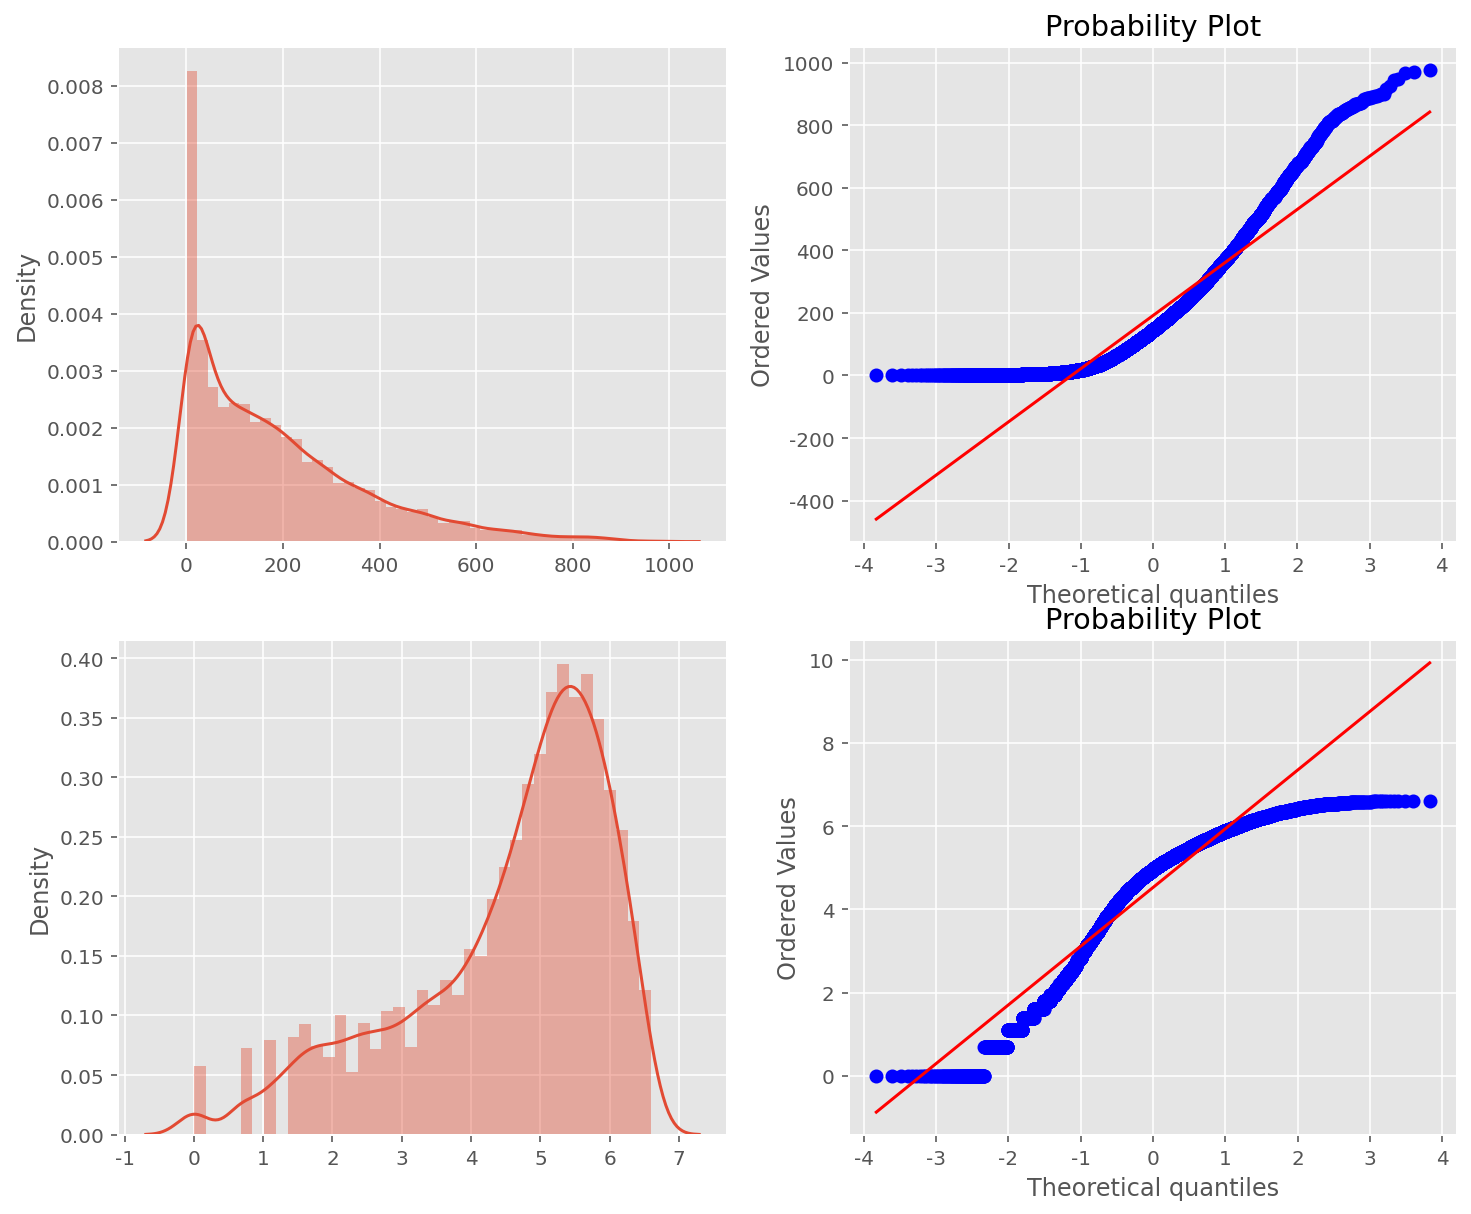

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(12,10))
sns.distplot(x=train['count'],ax=axes[0,0])
stats.probplot(x=train['count'],plot=axes[0,1])
sns.distplot(x=np.log(trainWithoutOutliers['count']),ax=axes[1,0])
stats.probplot(x=np.log(trainWithoutOutliers['count']),plot=axes[1,1])

###Feature Engineering

In [ ]:
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.shape

(6493, 9)

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


In [ ]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek

test.shape

(6493, 16)

풍속을 그래프화
- 분석에서 풍속의 값이 0이 가장 많았음 => 잘못 기록되어있는 데이터를 고쳐야함

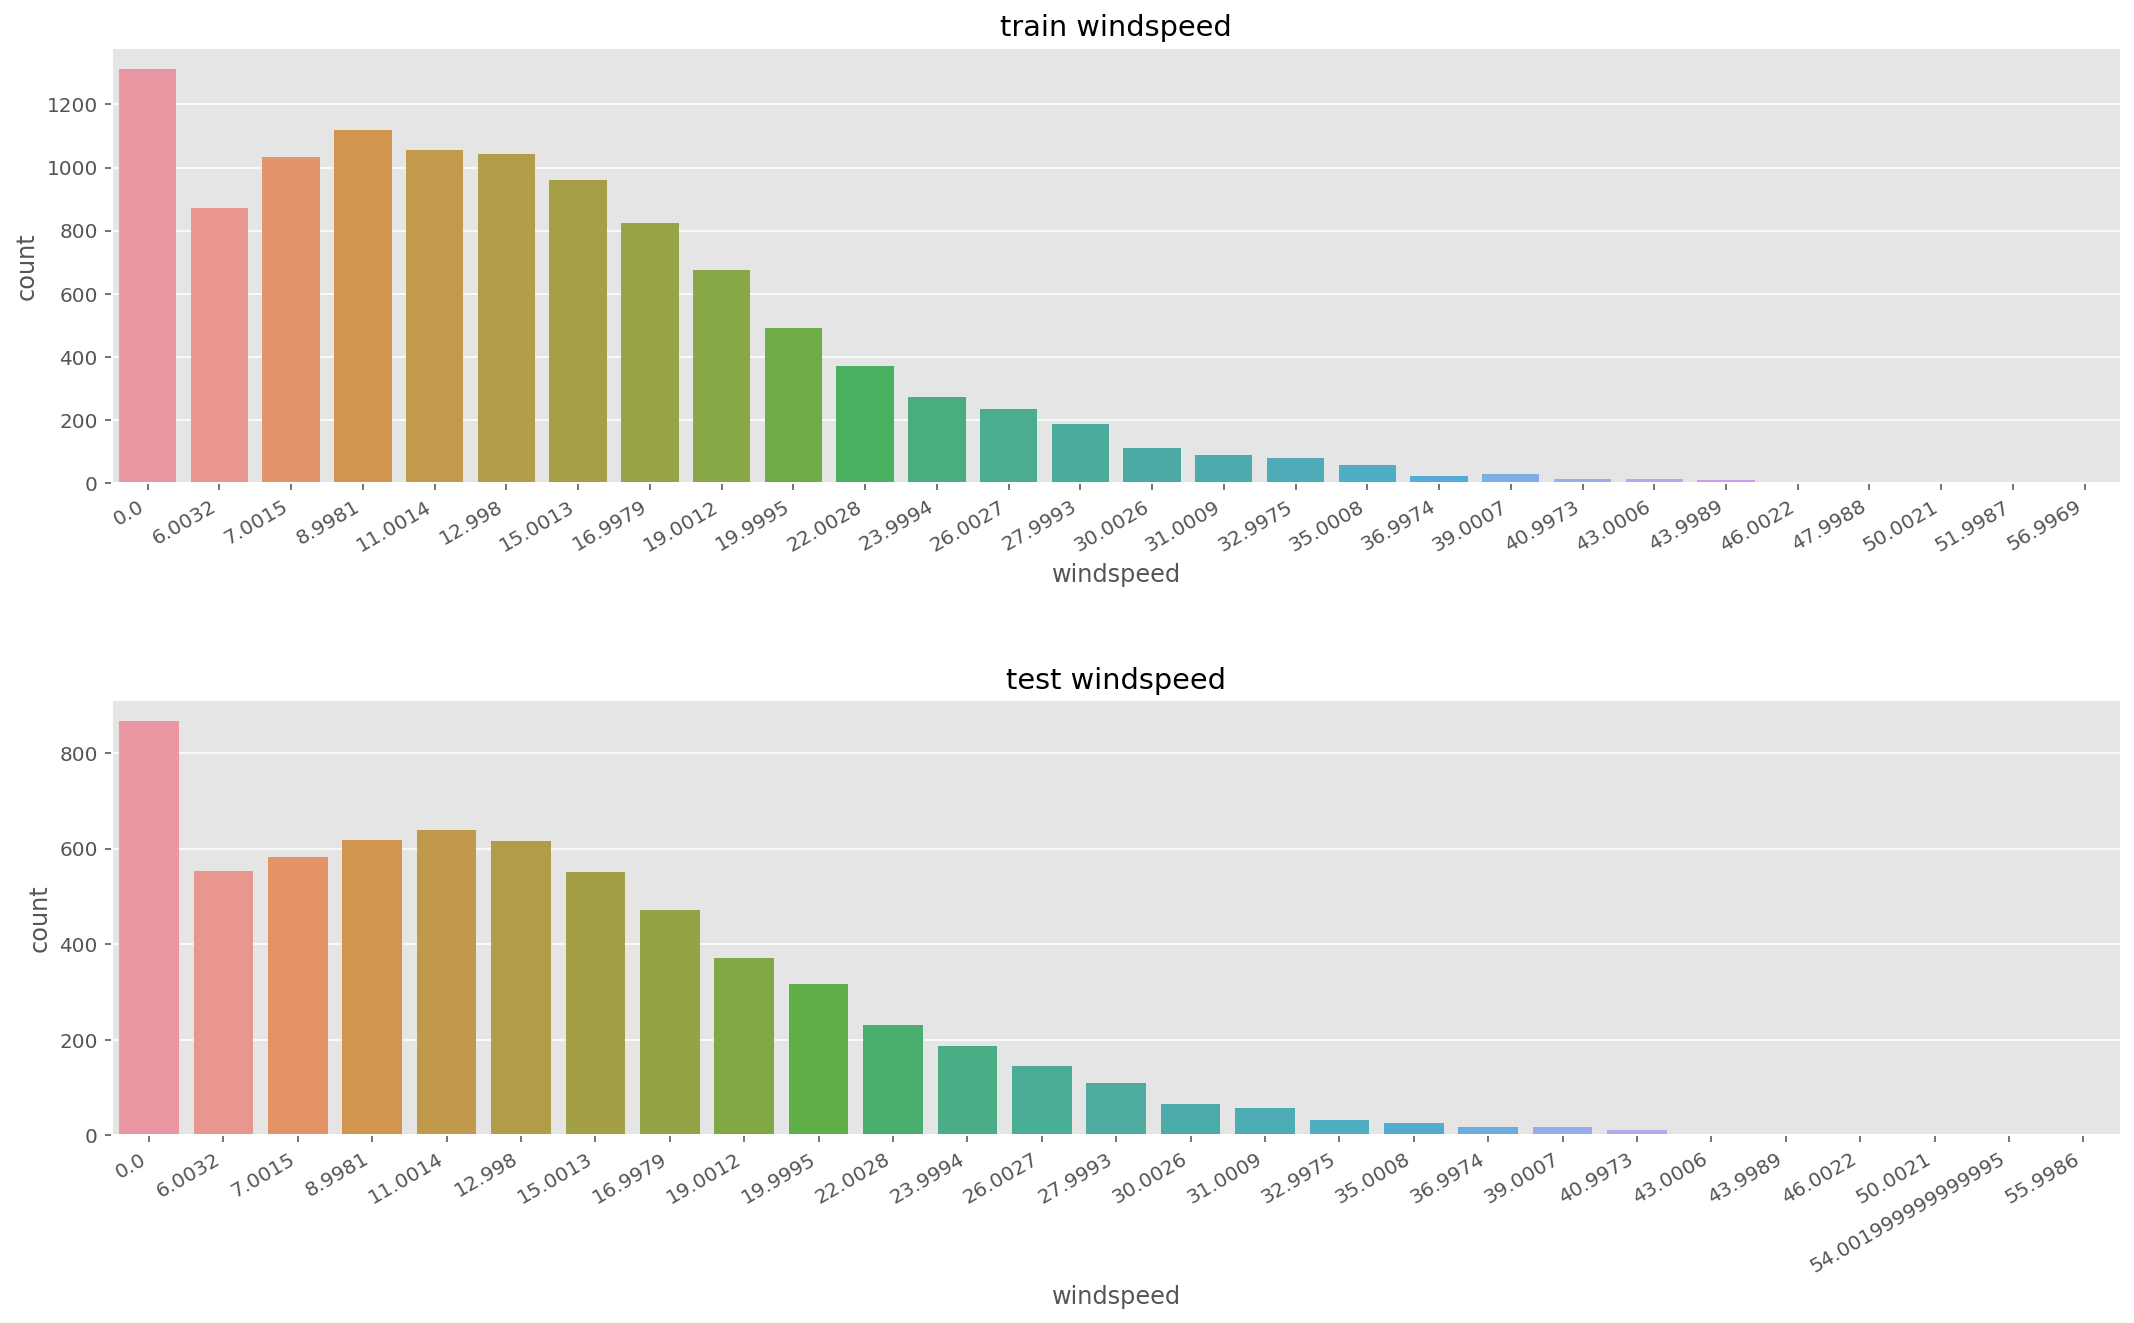

In [ ]:
fig, axes = plt.subplots(nrows=2,figsize=(18,10))
plt.sca(ax=axes[0])
plt.xticks(rotation=30, ha='right') #x값들을 오른쪽으로 30도 돌려줌 => 잘 보이게 하기 위함
axes[0].set(ylabel='Count', title='train windspeed')
sns.countplot(data=train, x='windspeed',ax=axes[0])

plt.sca(ax=axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel = 'Count', title='test windspeed')
sns.countplot(data=test, x='windspeed',ax=axes[1])
plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
train_wind0 = train.loc[train['windspeed'] == 0]
train_wind_not0 = train.loc[train['windspeed'] != 0]

print(train_wind0.shape)
print(train_wind_not0.shape)

(1313, 19)
(9573, 19)


머신러닝으로 풍속을 예측하기 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def predict_windspeed(data):
  #풍속이 0인것과 아닌 것을 나누어준다.
  data_wind0 = data.loc[data['windspeed'] == 0]
  data_wind_not0 = data.loc[data['windspeed'] != 0]
  #풍속을 예측할 피처를 선택한다.
  w_col = ['season','weather','humidity','month','temp','year','atemp']

  #풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꾸어 준다.
  data_wind_not0['windspeed'] = data_wind_not0['windspeed'].astype('str')

  #랜덤포레스트의 분류기를 사용한다.
  rf = RandomForestClassifier()
  #w_col에 있는 피처의 값을 바탕으로 풍속을 학습시킨다.
  rf.fit(data_wind_not0[w_col], data_wind_not0['windspeed'])
  #학습한 값을 바탕으로 풍속이 0으로 기록된 데이터의 풍속을 예측한다.
  prediction_wind0 = rf.predict(data_wind0[w_col])

  #값을 다 예측 후 비교해 보기 위해
  #예측한 값을 넣어 줄 데이터 프레임을 만든다.
  predict_wind0 = data_wind0
  predict_wind_not0 = data_wind_not0

  #값이 0으로 기록된 풍속에 대해 예측한 값을 넣어준다.
  predict_wind0['windspeed'] = prediction_wind0
  

  #데이터 프레임을 합쳐준다.
  data = predict_wind_not0.append(predict_wind0)
  #데이터의 풍속의 타입을 float으로 지정해준다.
  data['windspeed'] = data['windspeed'].astype('float')
  #데이터의 인덱스를 초기화 해주며 원본의 상태를 업데이트 한다.
  data.reset_index(inplace =True)
  #데이터의 인덱스 컬럼을 삭제한다.
  data.drop('index', inplace = True, axis=1)

  return data

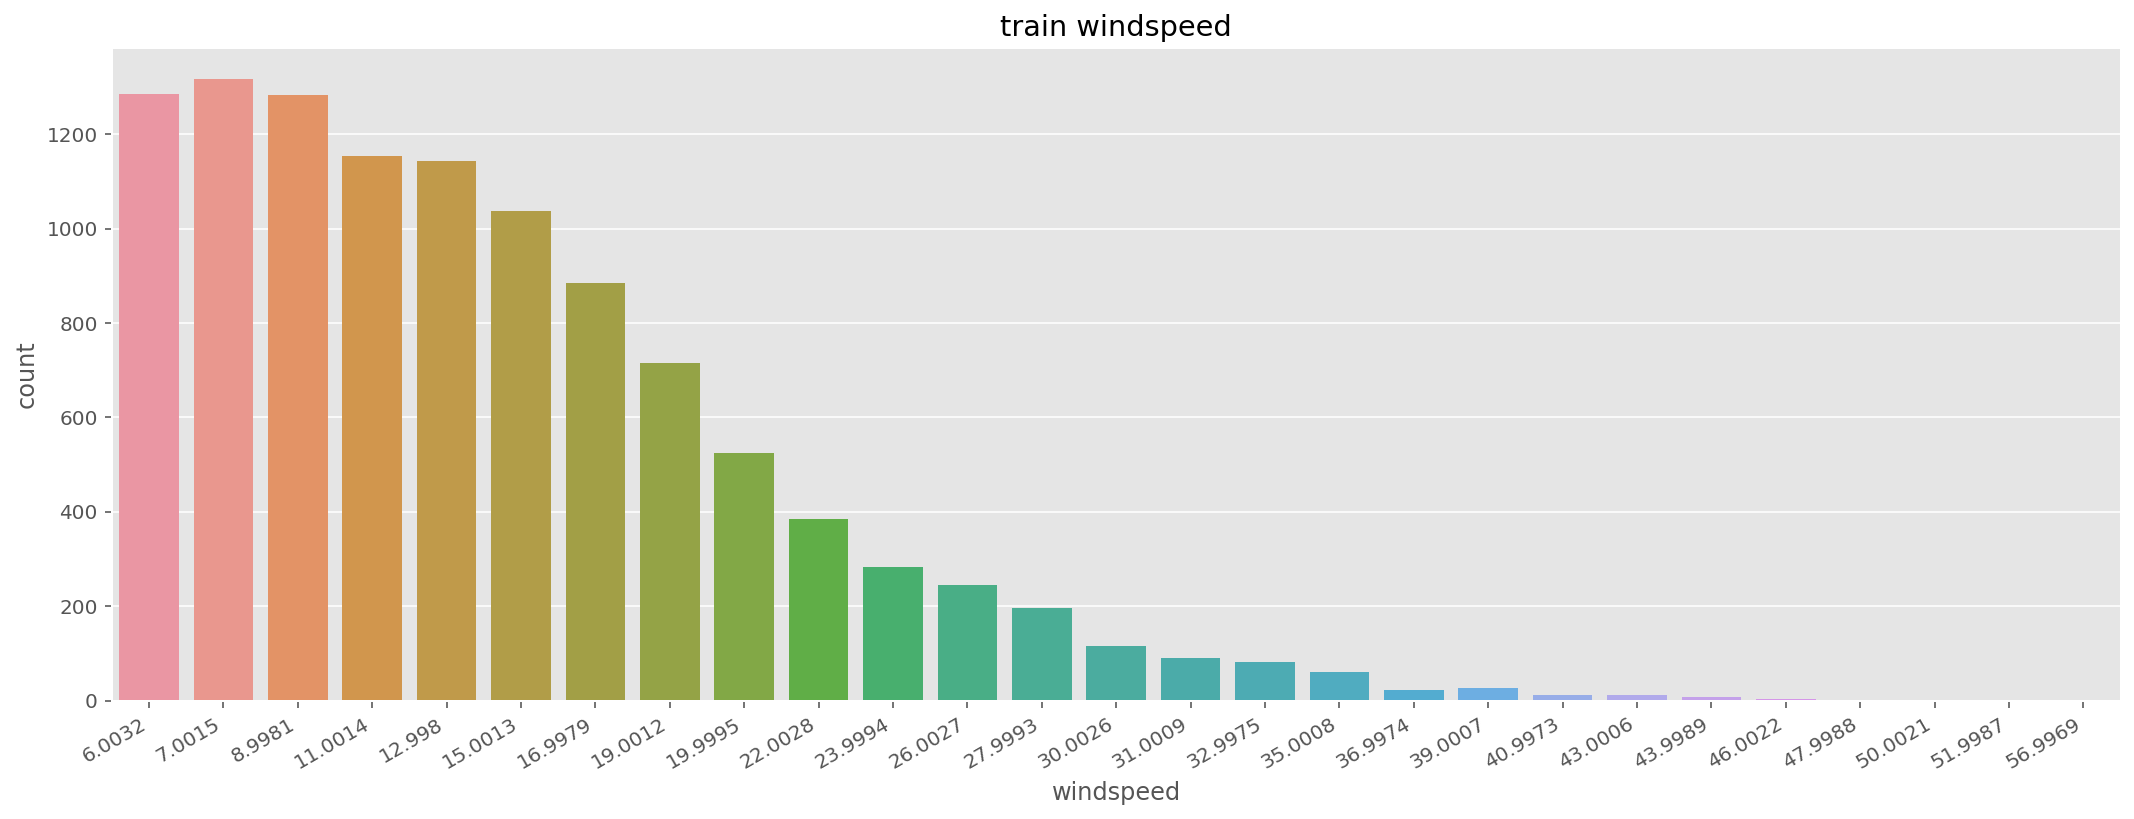

In [ ]:
#위에 작성한 메서드로 train 데이터의 풍속을 설정한다.
#train = predict_windspeed(train)

#train 데이터의 풍속을 시각화
fig, axes = plt.subplots(figsize=(18,6))

plt.sca(axes)
plt.xticks(rotation = 30, ha='right')
axes.set(ylabel='Count', title='train windspeed')
sns.countplot(data=train, x='windspeed',ax=axes)
plt.show()

###Feature Selection
- 신호와 잡음을 구분해야 한다.
- 특성이 많다고 무조건 좋은 성능을 내지 않는다.
- 성능을 하나씩 추가하고 변경해 가면서 성능이 좋지 않은 특성은 제거하도록 한다.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [ ]:
# 연속형 feature와 범주형 feature
# 연속형 feature = temp, atemp, humidity, windspeed
# 범주형 feature의 type을 category로 변경 해 준다.

categorical_feature_names = ['season','holiday','workingday','weather','year','month','hour','dayofweek' ]

for var in categorical_feature_names:
  train[var] = train[var].astype('category')
  test[var] = test[var].astype('category')

In [ ]:
feature_names = ['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','year','hour','dayofweek' ]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek']

In [ ]:
#훈련데이터
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek
0,1,0,0,2,9.84,12.880,75,6.0032,2011,5,5
1,1,0,0,1,15.58,19.695,76,16.9979,2011,10,5
2,1,0,0,1,14.76,16.665,81,19.0012,2011,11,5
3,1,0,0,1,17.22,21.210,77,19.0012,2011,12,5
4,1,0,0,2,18.86,22.725,72,19.9995,2011,13,5


In [ ]:
#테스트 데이터
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [ ]:
#타겟 데이터
target = 'count'
y_train = train[target]
print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

###RMSLE
회귀의 평가를 위한 지표
- 실제값과 회귀 예측값의 차이를 기반으로 한다.
- 값이 작을 수록(0에 가까울수록) 회귀의 성능이 좋다 = 예측값과 실제값의 차이가 거의 없다

- 이상치가 있더라도 변동폭이 크지 않다.

###공식
$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $

In [ ]:
from sklearn.metrics import make_scorer
def rmsle(p_i,a_i):
  p_i = np.array(p_i)
  a_i = np.array(a_i)
  log_pi = np.log(p_i + 1) #로그화
  log_ai = np.log(a_i + 1) #로그화
  diff_squ = np.square(log_pi-log_ai) #오차의 제곱
  result = np.sqrt(diff_squ.mean()) #오차의 제곱을 평균한 것에 제곱근
  return result
rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10,shuffle=True, random_state=0)

### Model Predict
RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
max_depth_list = []

model = RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=0)

model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
#시간표시
%time score = cross_val_score(model, X_train, y_train,cv=k_fold,scoring=rmsle_scorer)
score = score.mean()
#0에 근접할 수록 좋은 데이터
print('Score = {0:.5f}'.format(score))

CPU times: user 3.55 s, sys: 720 ms, total: 4.27 s
Wall time: 30.9 s
Score = 0.33083


###Train

In [ ]:
#학습 시킴, 피팅(옷에 맞출때 사용하는 피팅을 생각함) - 특성과 타겟을 넣어주면 알아서 학습 함
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
#예측
predictions = model.predict(X_test)
print(predictions.shape)
predictions[:10]

(6493,)


array([ 12.46,   4.93,   4.14,   3.67,   3.19,   6.27,  38.33, 105.72,
       236.65, 136.02])

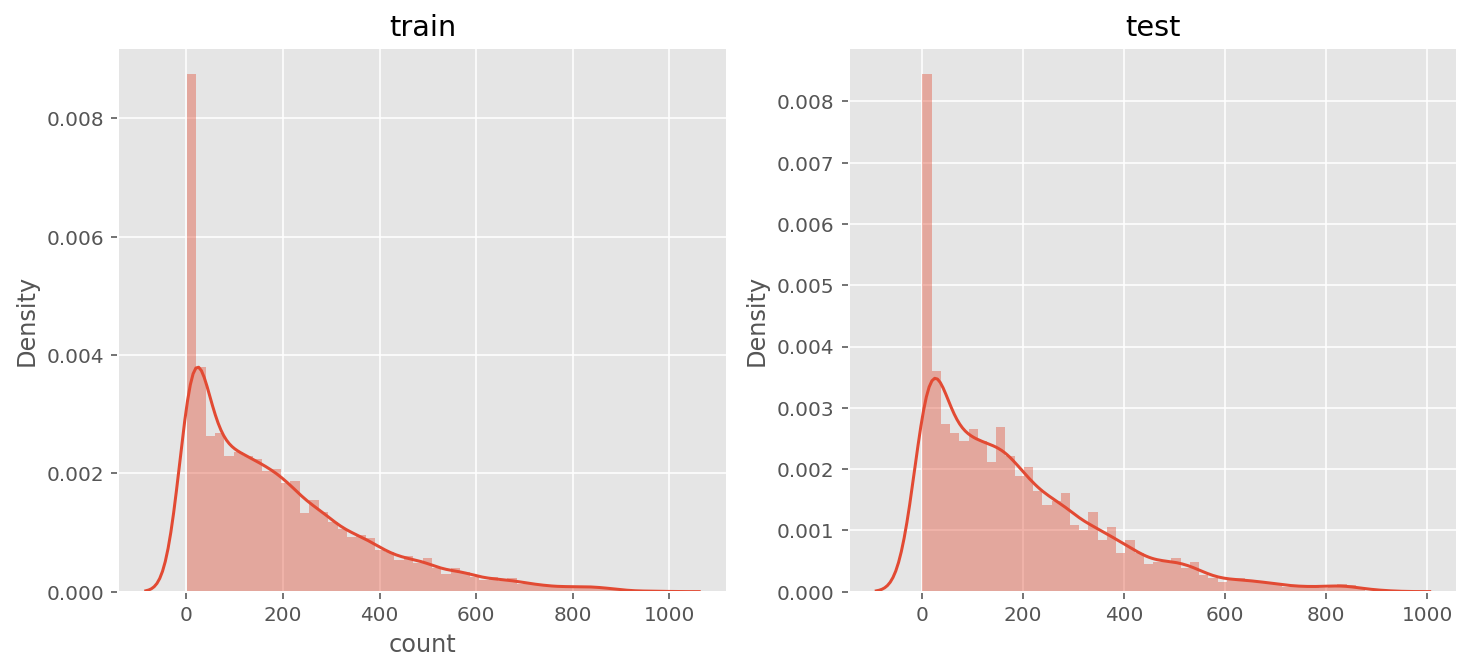

In [ ]:
#예측한 데이터를 시각화 해본다
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
sns.distplot(y_train, ax=ax1, bins=50)
sns.distplot(predictions, ax=ax2,bins=50)
ax1.set(title="train")
ax2.set(title='test')
plt.show()